In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fake_df = pd.read_csv("C:/Users/samiksha/Downloads/DS INTER PP/codec/Fake.csv/Fake.csv")
true_df = pd.read_csv("C:/Users/samiksha/Downloads/DS INTER PP/codec/True.csv/True.csv")

fake_df['label'] = 0   # Fake news
true_df['label'] = 1   # Real news

df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,EMOTIONAL TRUMP ENDORSEMENT From Former FBI As...,Former FBI Asst Director James Kallstrom endor...,Government News,"Oct 19, 2016",0
1,NEIL CAVUTO AND YOUNG COMMIE CLASH: “The capit...,Pro-Bernie Sanders Commie clashes with Neil Ca...,left-news,"Apr 14, 2016",0
2,Deborah Messing And Susan Sarandon’s EPIC Pol...,Two avid Democrats took to Twitter this week t...,News,"April 1, 2016",0
3,Donald Trump Is Going To HATE What The NY Tim...,If you needed more proof that Donald Trump is ...,News,"October 24, 2016",0
4,White House says no evidence of Trump team col...,"WASHINGTON (Reuters) - The White House, respon...",politicsNews,"May 23, 2017",1


In [3]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['text'] = df['text'].apply(clean_text)


In [5]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.7,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)


LinearSVC()

In [8]:
y_pred = model.predict(X_test_tfidf)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.994097995545657

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4704
           1       0.99      1.00      0.99      4276

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



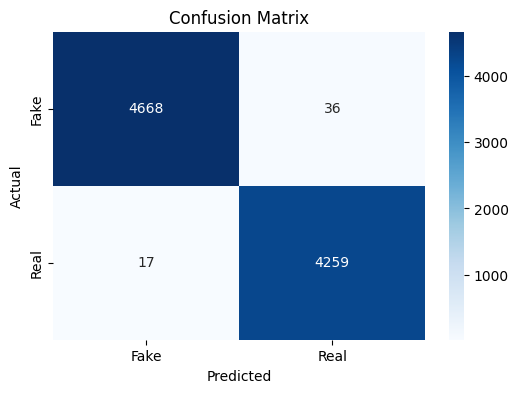

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
sample_news = ["Government announces new education policy for universities"]

sample_cleaned = [clean_text(sample_news[0])]
sample_vector = tfidf.transform(sample_cleaned)

prediction = model.predict(sample_vector)

print("Prediction:", "Real News" if prediction[0] == 1 else "Fake News")


Prediction: Fake News


### Conclusion
This project demonstrates the application of NLP and machine learning techniques
to detect fake news. Using TF-IDF and SVM, the model achieves strong classification
performance and can help identify misinformation effectively.
Accuracy: 0.9946547884187082